In [31]:
import matplotlib.pyplot as plt
from mu2e.src.fiteval_c import FitFunctionMaker
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
ffm= FitFunctionMaker("../mu2e/src/param_825.csv")

In [5]:
out = ffm.mag_field_function(-100,200,9000,True)
print out[0], out[1], out[2]

-0.00210681449619 0.0015202082932 1.02539680847


Using the field fitting function, generate a set of Bz values for a 1D section in the Z direction.

In [88]:
def bz_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[2]
vbz_func = np.vectorize(bz_func,excluded=['x','y'])

def by_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[1]
vby_func = np.vectorize(by_func,excluded=['x','z'])

def bx_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[0]
vbx_func = np.vectorize(bx_func,excluded=['y','z'])

In [103]:
zs_1 = np.linspace(7900,8000,101)
zs_2 = np.linspace(7200,7400,201)
zs_3 = np.linspace(9800,10300,501)

xs = ys  = np.linspace(100,300,301)

In [104]:
bzs_1 = vbz_func(x = 0, y = 0, z = zs_1)
bzs_2 = vbz_func(x = 0, y = 650, z = zs_2)
bzs_3 = vbz_func(x = 0, y = 0, z = zs_3)

bxs = vbx_func(x=xs, y=100, z=6500)
bys = vby_func(x=100, y=ys, z=6500)

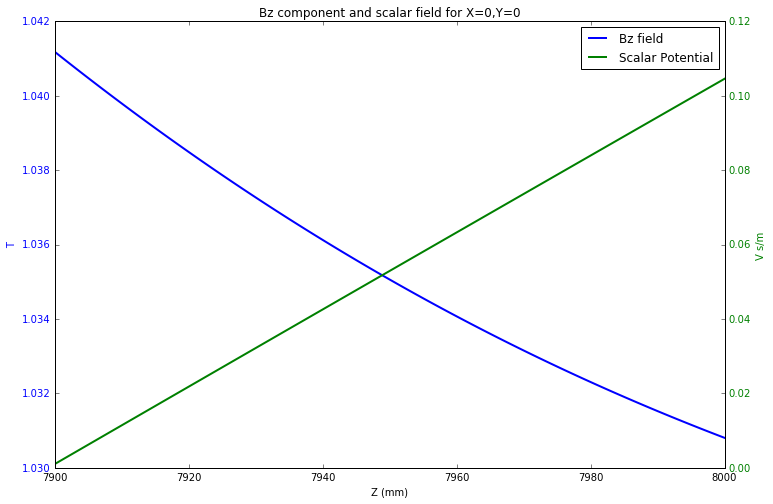

In [105]:
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_1,bzs_1,'b-',linewidth=2,label='Bz field')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
p2 = ax2.plot(zs_1,np.cumsum(bzs_1)/1000,'g-',linewidth=2,label='Scalar Potential')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=0')
lns = p1+p2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='best')


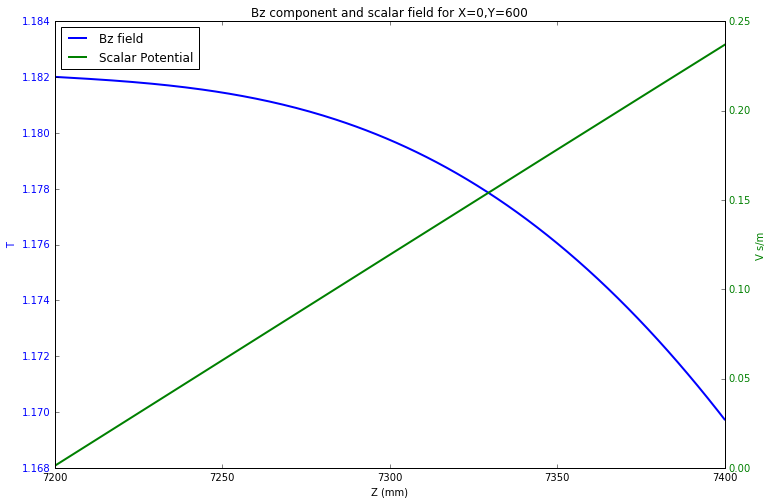

In [106]:
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_2,bzs_2,'b-',linewidth=2,label='Bz field')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
p2 = ax2.plot(zs_2,np.cumsum(bzs_2)/1000,'g-',linewidth=2,label='Scalar Potential')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=600')
lns = p1+p2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='best')

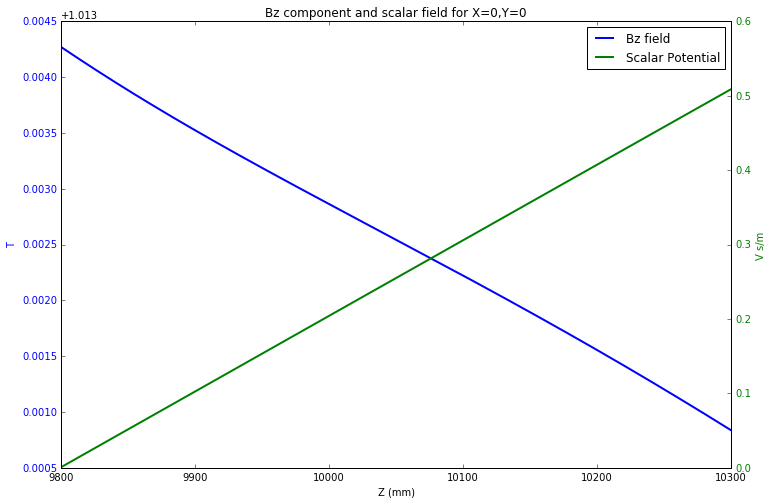

In [107]:
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_3,bzs_3,'b-',linewidth=2,label='Bz field')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
p2 = ax2.plot(zs_3,np.cumsum(bzs_3)/1000,'g-',linewidth=2,label='Scalar Potential')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=0')
lns = p1+p2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='best')

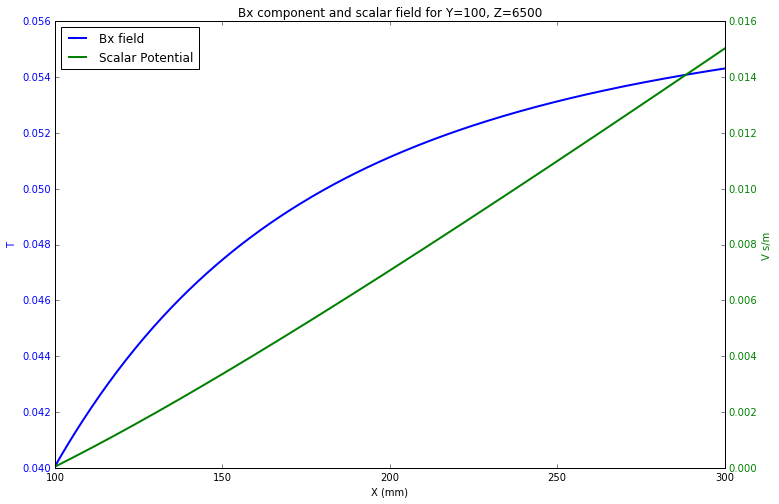

In [108]:
fig, ax1 = plt.subplots()
p1 = ax1.plot(xs,bxs,'b-',linewidth=2,label='Bx field')
ax1.set_xlabel('X (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
p2 = ax2.plot(xs,np.cumsum(bxs)/1000,'g-',linewidth=2,label='Scalar Potential')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bx component and scalar field for Y=100, Z=6500')
lns = p1+p2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='best')

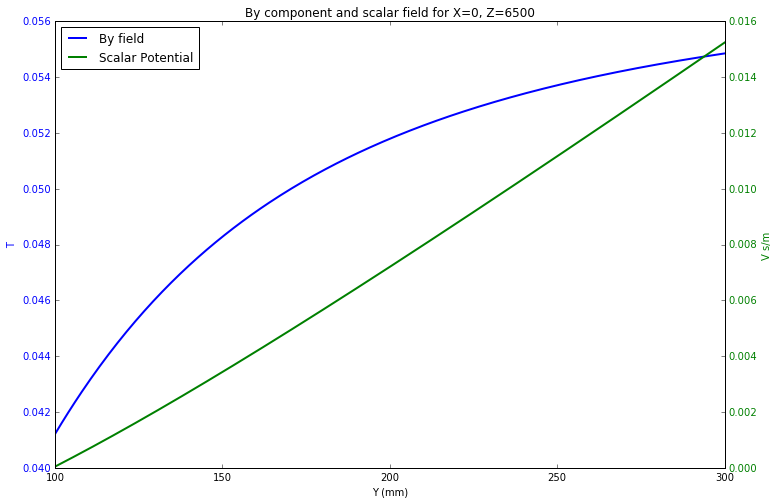

In [109]:
fig, ax1 = plt.subplots()
p1 = ax1.plot(ys,bys,'b-',linewidth=2,label='By field')
ax1.set_xlabel('Y (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
p2 = ax2.plot(ys,np.cumsum(bys)/1000,'g-',linewidth=2,label='Scalar Potential')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('By component and scalar field for X=0, Z=6500')
lns = p1+p2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='best')